In [ ]:
!pip install diffusers transformers accelerate torch-fidelity torchmetrics[image]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.6/37.6 MB 48.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 961.5/961.5 kB 41.6 MB/s eta 0:00:00


Mean Squared Error (MSE): 0.005861
Structural Similarity Index Measure (SSIM): 0.866938


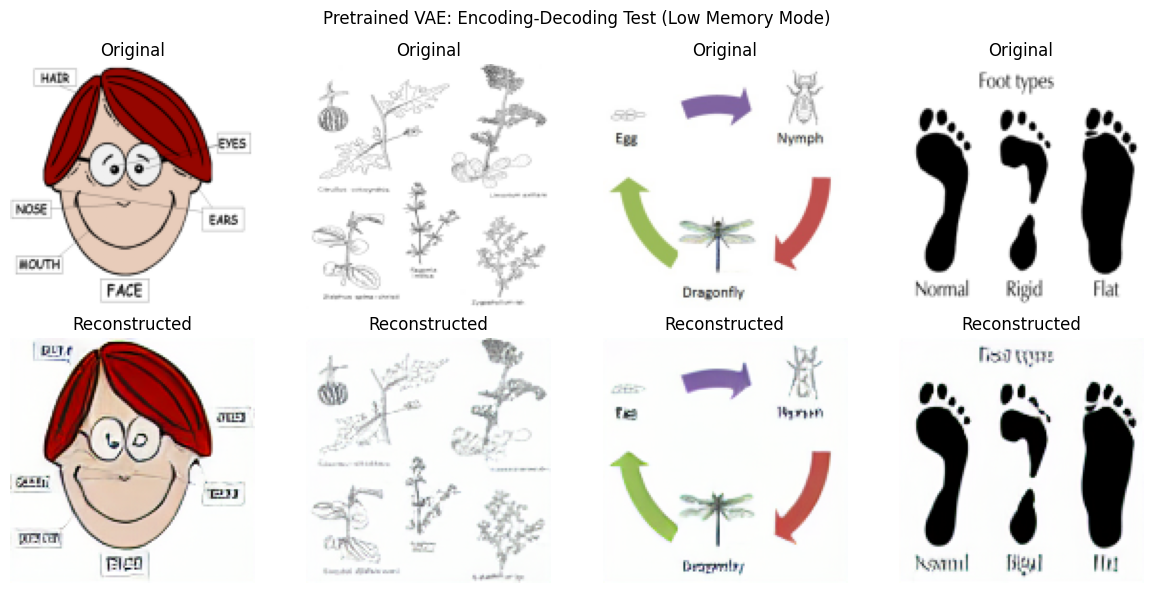

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from diffusers import AutoencoderKL
from torchmetrics.image.ssim import StructuralSimilarityIndexMeasure

# Device: Using the CPU to avoid OOM crashes
device = torch.device("cpu")

# Loading the pretrained Stable Diffusion VAE
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae").to(device)
vae.eval()

# Loading the dataset
data = torch.load("educational_diagram_data.pt", map_location=device)
images = data["images"][:4]  # Considering only 4 images for a quick test

# Resizing the images to 128x128 for low memory testing
images = F.interpolate(images, size=128, mode='bilinear', align_corners=False)

# Normalizing the images from [0,1] to [-1,1]
normalized = images * 2 - 1

# Encoding and decoding steps
with torch.no_grad():
    latents = vae.encode(normalized).latent_dist.sample()
    recon = vae.decode(latents).sample
    recon = (recon + 1) / 2  # Rescaling the reconstructed images back to [0,1]

# Clamping and moving the tensors to CPU
images = images.clamp(0, 1).cpu()
recon = recon.clamp(0, 1).cpu()

# MSE Calculation
mse_loss = F.mse_loss(recon, images)
print(f"Mean Squared Error (MSE): {mse_loss.item():.6f}")

# SSIM Calculation (per image)
ssim = StructuralSimilarityIndexMeasure(data_range=1.0)
ssim_score = ssim(recon, images)
print(f"Structural Similarity Index Measure (SSIM): {ssim_score.item():.6f}")

fig, axs = plt.subplots(2, 4, figsize=(12, 6))
for i in range(4):
    axs[0, i].imshow(images[i].permute(1, 2, 0))
    axs[0, i].axis('off')
    axs[0, i].set_title("Original")

    axs[1, i].imshow(recon[i].permute(1, 2, 0))
    axs[1, i].axis('off')
    axs[1, i].set_title("Reconstructed")

plt.suptitle("Pretrained VAE: Encoding-Decoding Test (Low Memory Mode)")
plt.tight_layout()
plt.show()

Epoch 1/100: 100%|██████████| 958/958 [05:00<00:00,  3.19it/s]


Epoch 1: Train Loss = 0.0098, Val Loss = 0.0027
Saved Best Model at Epoch 1 with Val Loss 0.0027


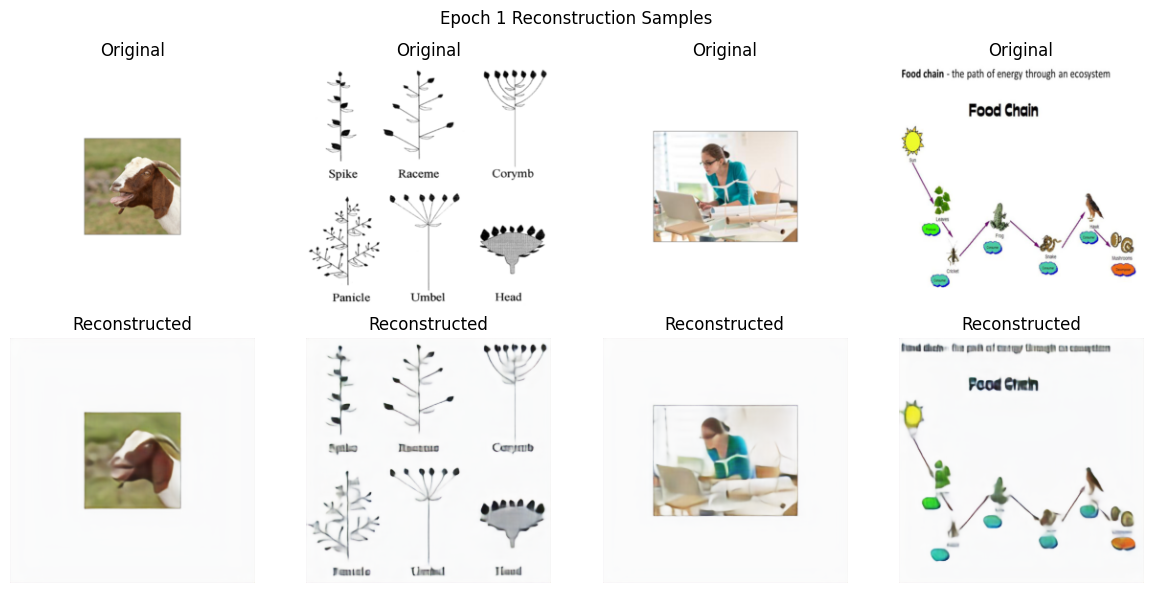

Epoch 2/100: 100%|██████████| 958/958 [04:51<00:00,  3.29it/s]


Epoch 2: Train Loss = 0.0026, Val Loss = 0.0022
Saved Best Model at Epoch 2 with Val Loss 0.0022


Epoch 3/100: 100%|██████████| 958/958 [04:49<00:00,  3.31it/s]


Epoch 3: Train Loss = 0.0023, Val Loss = 0.0020
Saved Best Model at Epoch 3 with Val Loss 0.0020


Epoch 4/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 4: Train Loss = 0.0021, Val Loss = 0.0018
Saved Best Model at Epoch 4 with Val Loss 0.0018


Epoch 5/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 5: Train Loss = 0.0020, Val Loss = 0.0018
Saved Best Model at Epoch 5 with Val Loss 0.0018


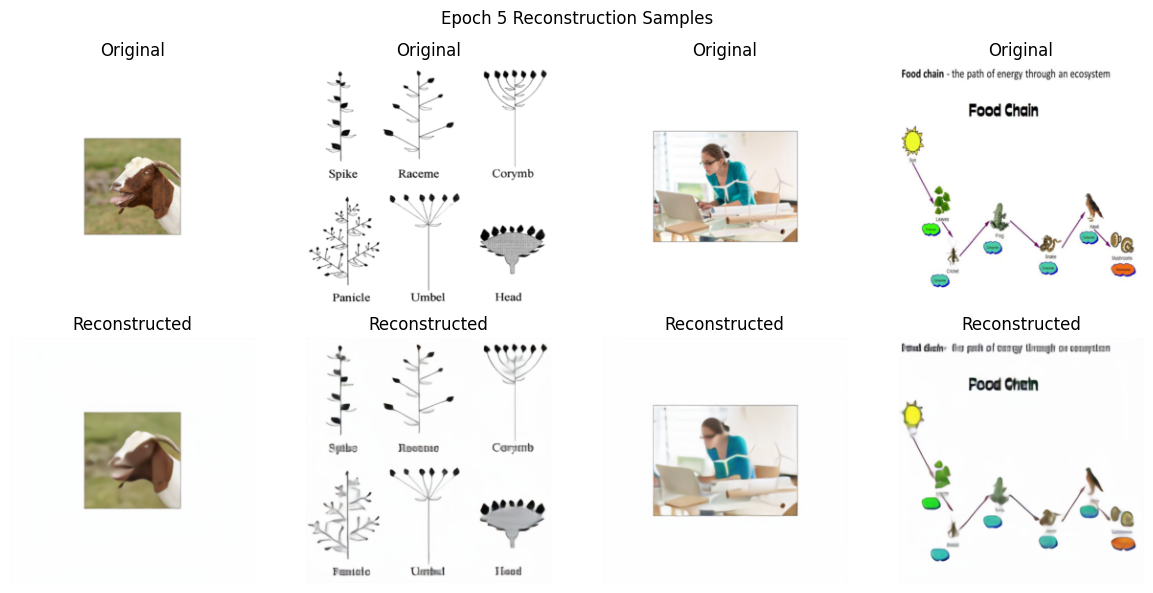

Epoch 6/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 6: Train Loss = 0.0019, Val Loss = 0.0017
Saved Best Model at Epoch 6 with Val Loss 0.0017


Epoch 7/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 7: Train Loss = 0.0018, Val Loss = 0.0016
Saved Best Model at Epoch 7 with Val Loss 0.0016


Epoch 8/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 8: Train Loss = 0.0017, Val Loss = 0.0016
Saved Best Model at Epoch 8 with Val Loss 0.0016


Epoch 9/100: 100%|██████████| 958/958 [04:45<00:00,  3.36it/s]


Epoch 9: Train Loss = 0.0017, Val Loss = 0.0016
Saved Best Model at Epoch 9 with Val Loss 0.0016


Epoch 10/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 10: Train Loss = 0.0016, Val Loss = 0.0016
Saved Best Model at Epoch 10 with Val Loss 0.0016


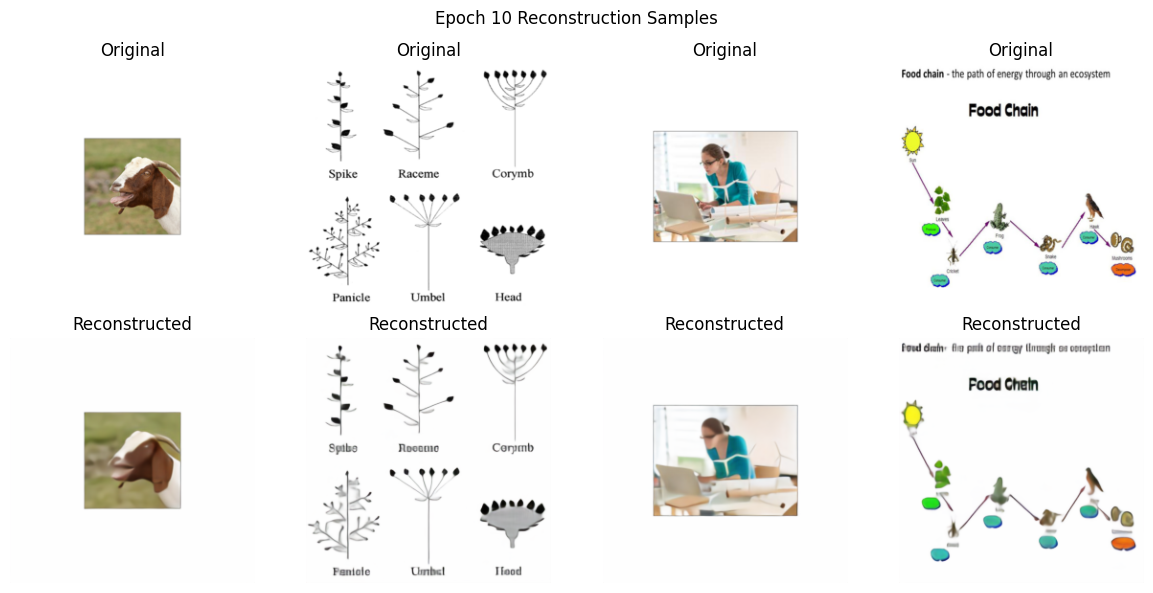

Epoch 11/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 11: Train Loss = 0.0016, Val Loss = 0.0015
Saved Best Model at Epoch 11 with Val Loss 0.0015


Epoch 12/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 12: Train Loss = 0.0016, Val Loss = 0.0016


Epoch 13/100: 100%|██████████| 958/958 [04:44<00:00,  3.37it/s]


Epoch 13: Train Loss = 0.0015, Val Loss = 0.0015
Saved Best Model at Epoch 13 with Val Loss 0.0015


Epoch 14/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 14: Train Loss = 0.0015, Val Loss = 0.0015


Epoch 15/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 15: Train Loss = 0.0015, Val Loss = 0.0014
Saved Best Model at Epoch 15 with Val Loss 0.0014


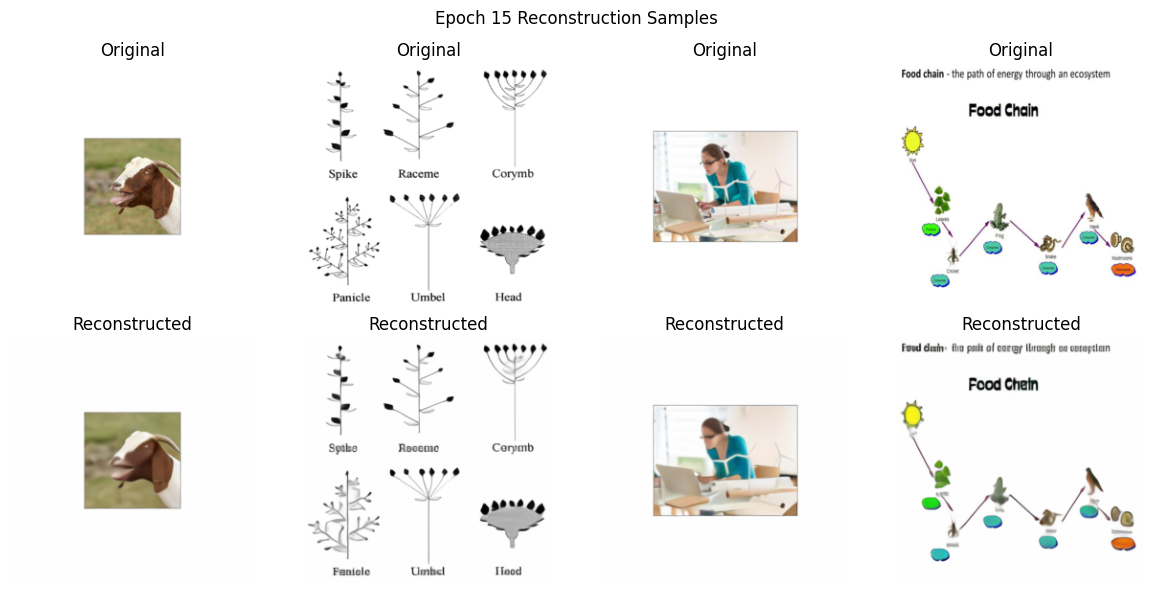

Epoch 16/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 16: Train Loss = 0.0014, Val Loss = 0.0014
Saved Best Model at Epoch 16 with Val Loss 0.0014


Epoch 17/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 17: Train Loss = 0.0014, Val Loss = 0.0014
Saved Best Model at Epoch 17 with Val Loss 0.0014


Epoch 18/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 18: Train Loss = 0.0014, Val Loss = 0.0014
Saved Best Model at Epoch 18 with Val Loss 0.0014


Epoch 19/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 19: Train Loss = 0.0014, Val Loss = 0.0014
Saved Best Model at Epoch 19 with Val Loss 0.0014


Epoch 20/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 20: Train Loss = 0.0013, Val Loss = 0.0014


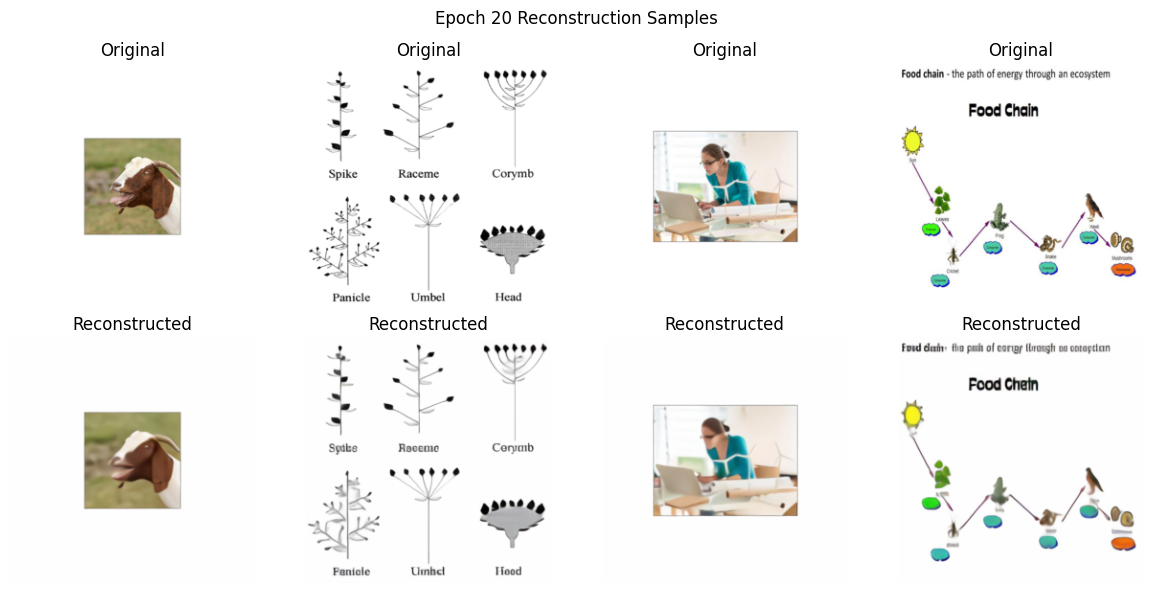

Epoch 21/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 21: Train Loss = 0.0013, Val Loss = 0.0014
Saved Best Model at Epoch 21 with Val Loss 0.0014


Epoch 22/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 22: Train Loss = 0.0013, Val Loss = 0.0014
Saved Best Model at Epoch 22 with Val Loss 0.0014


Epoch 23/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 23: Train Loss = 0.0013, Val Loss = 0.0014


Epoch 24/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 24: Train Loss = 0.0013, Val Loss = 0.0014


Epoch 25/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 25: Train Loss = 0.0012, Val Loss = 0.0014


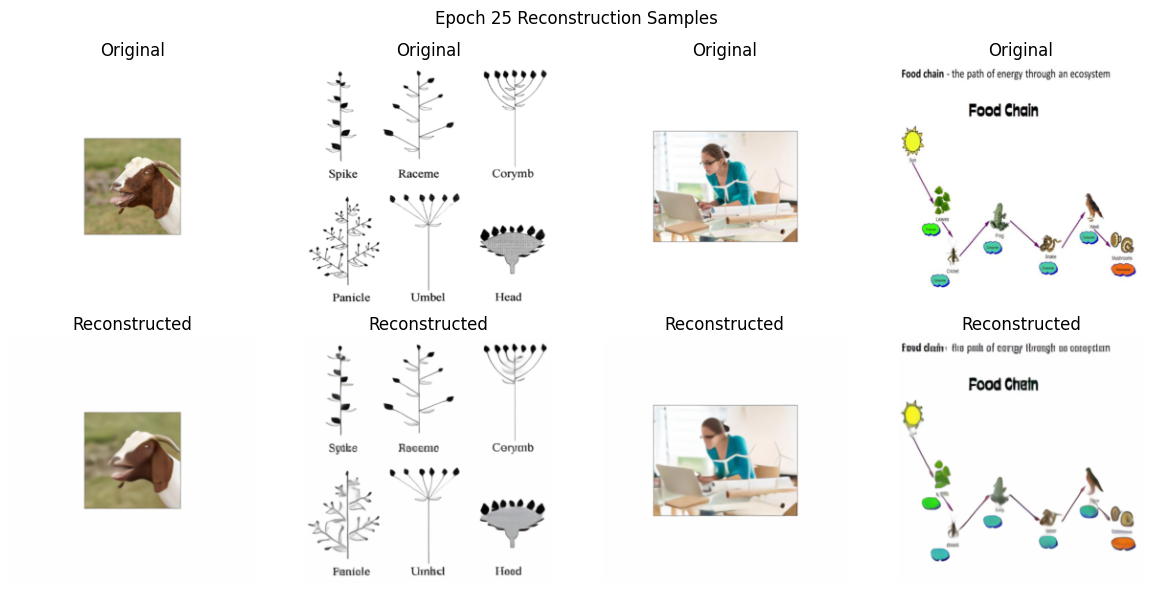

Epoch 26/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 26: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 27/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 27: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 28/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 28: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 29/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 29: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 30/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 30: Train Loss = 0.0012, Val Loss = 0.0014
Saved Best Model at Epoch 30 with Val Loss 0.0014


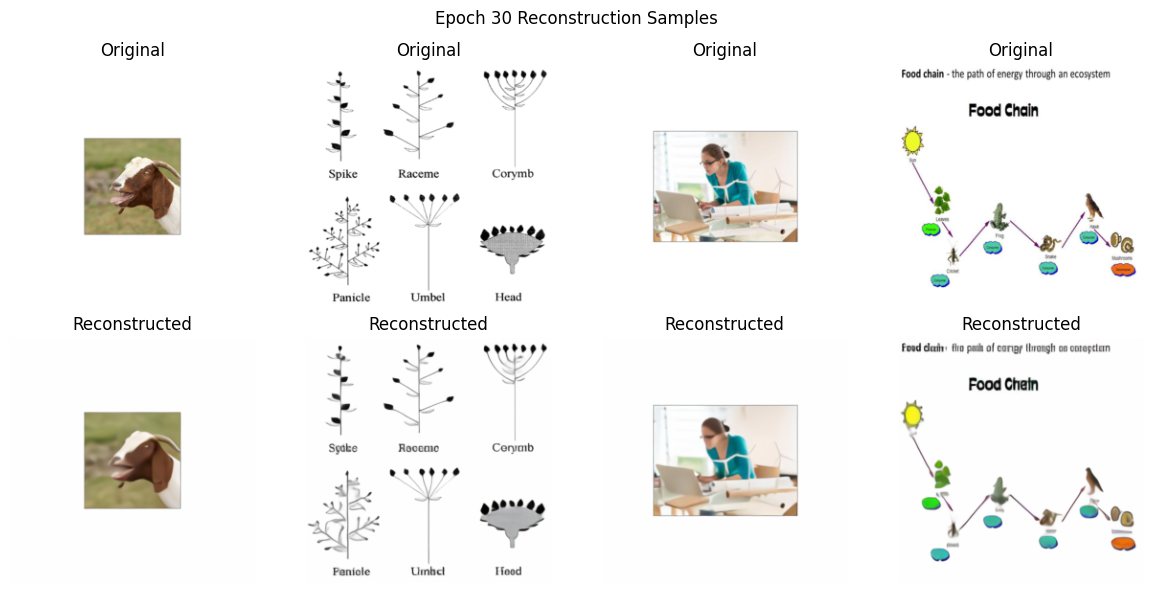

Epoch 31/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 31: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 32/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 32: Train Loss = 0.0012, Val Loss = 0.0014


Epoch 33/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 33: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 34/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 34: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 35/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 35: Train Loss = 0.0011, Val Loss = 0.0014


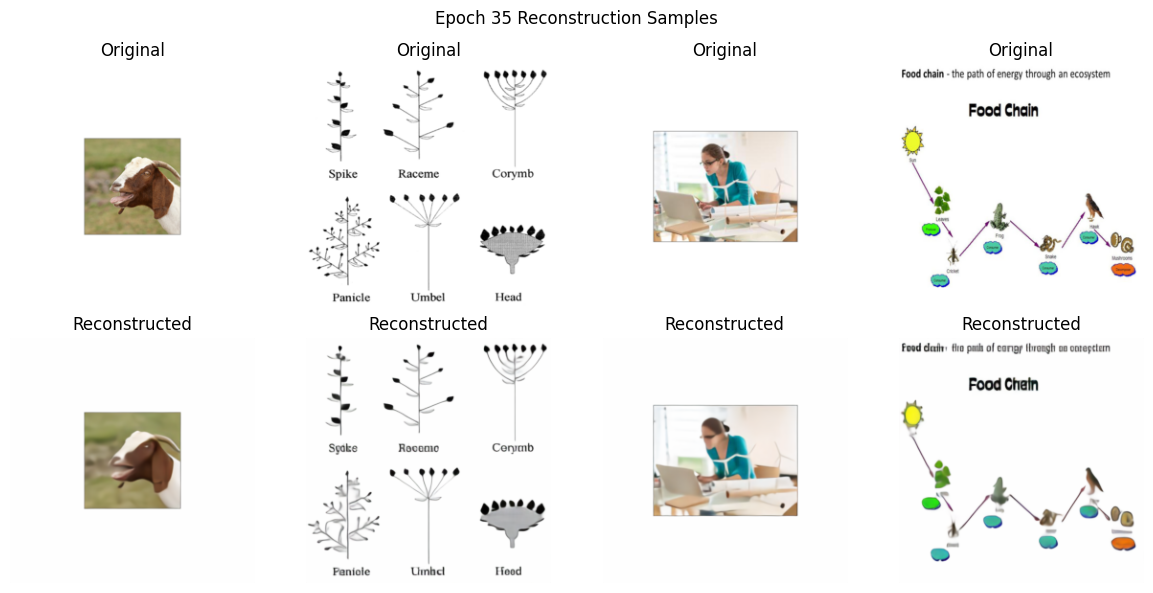

Epoch 36/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 36: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 37/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 37: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 38/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 38: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 39/100: 100%|██████████| 958/958 [04:42<00:00,  3.39it/s]


Epoch 39: Train Loss = 0.0011, Val Loss = 0.0014


Epoch 40/100: 100%|██████████| 958/958 [04:43<00:00,  3.38it/s]


Epoch 40: Train Loss = 0.0011, Val Loss = 0.0014
Early Stopping triggered after 40 epochs.
Training Complete. Best Validation Loss: 0.0014


In [ ]:
# Importing all the necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader, random_split
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from diffusers import AutoencoderKL
import gc

# Seting up the device and reproducibility
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.manual_seed(42)
torch.cuda.manual_seed(42)
torch.backends.cudnn.benchmark = True  # Optimization for fixed-size inputs

# Loading the dataset
data = torch.load("educational_diagram_data.pt")
images = data["images"]

class ImageOnlyDataset(Dataset):
    def __init__(self, images_tensor):
        self.images = images_tensor
    def __len__(self):
        return self.images.shape[0]
    def __getitem__(self, idx):
        return self.images[idx]

full_ds = ImageOnlyDataset(images)
train_size = int(0.8 * len(full_ds))
val_size = int(0.1 * len(full_ds))
test_size = len(full_ds) - train_size - val_size

train_ds, val_ds, test_ds = random_split(full_ds, [train_size, val_size, test_size])

train_loader = DataLoader(train_ds, batch_size=8, shuffle=True, num_workers=0, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=8, shuffle=False, num_workers=0, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False, num_workers=0, pin_memory=True)

# Loading the pre-trained VAE
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae").to(device)
vae.train()

# Fine-tuning the Encoder + Decoder + Post-Quant Conv
trainable_params = (
    list(vae.encoder.parameters()) +
    list(vae.decoder.parameters()) +
    list(vae.post_quant_conv.parameters())
)
optimizer = optim.AdamW(trainable_params, lr=2e-5)

# Learning Rate Scheduler
scheduler = optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=50)

# Mixed Precision Training
scaler = torch.cuda.amp.GradScaler()

# Training configuration
num_epochs = 100
visualize_every = 5
early_stop_patience = 10
best_val_loss = float('inf')
epochs_no_improve = 0

train_losses = []
val_losses = []

# Training Loop
for epoch in range(1, num_epochs + 1):
    vae.train()
    train_loss = 0.0
    pbar = tqdm(train_loader, desc=f"Epoch {epoch}/{num_epochs}")

    for x in pbar:
        x = x.to(device)

        with torch.no_grad():
            z = vae.encode(x).latent_dist.sample() * vae.config.scaling_factor

        optimizer.zero_grad(set_to_none=True)

        with torch.cuda.amp.autocast():
            recon = vae.decode(z).sample
            recon = torch.sigmoid(recon)
            loss = F.mse_loss(recon, x)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        train_loss += loss.item()

    train_loss /= len(train_loader)
    train_losses.append(train_loss)

    # Validation Phase
    vae.eval()
    val_loss = 0.0
    with torch.no_grad():
        for x in val_loader:
            x = x.to(device)
            with torch.cuda.amp.autocast():
                z = vae.encode(x).latent_dist.sample() * vae.config.scaling_factor
                recon = torch.sigmoid(vae.decode(z).sample)
                val_loss += F.mse_loss(recon, x).item()
    val_loss /= len(val_loader)
    val_losses.append(val_loss)

    print(f"Epoch {epoch}: Train Loss = {train_loss:.4f}, Val Loss = {val_loss:.4f}")

    # Saving the Best Model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        epochs_no_improve = 0
        torch.save(vae.state_dict(), "best_fine_tuned_vae.pth")
        print(f"Saved Best Model at Epoch {epoch} with Val Loss {val_loss:.4f}")
    else:
        epochs_no_improve += 1

    # Early Stopping
    if epochs_no_improve >= early_stop_patience:
        print(f"Early Stopping triggered after {epoch} epochs.")
        break

    # Scheduler Step
    scheduler.step()

    # Visualization every few epochs
    if epoch % visualize_every == 0 or epoch == 1:
        vae.eval()
        sample = next(iter(val_loader))[:4].to(device)
        with torch.no_grad():
            z = vae.encode(sample).latent_dist.sample() * vae.config.scaling_factor
            recon = torch.sigmoid(vae.decode(z).sample)

        fig, axs = plt.subplots(2, 4, figsize=(12, 6))
        for i in range(4):
            axs[0, i].imshow(sample[i].cpu().permute(1, 2, 0))
            axs[0, i].axis('off')
            axs[0, i].set_title('Original')
            axs[1, i].imshow(recon[i].cpu().permute(1, 2, 0))
            axs[1, i].axis('off')
            axs[1, i].set_title('Reconstructed')
        plt.suptitle(f"Epoch {epoch} Reconstruction Samples")
        plt.tight_layout()
        plt.show()

    # Freeing up the memory
    gc.collect()
    torch.cuda.empty_cache()

print(f"Training Complete. Best Validation Loss: {best_val_loss:.4f}")


Test MSE: 0.000523
Test SSIM: 0.971468


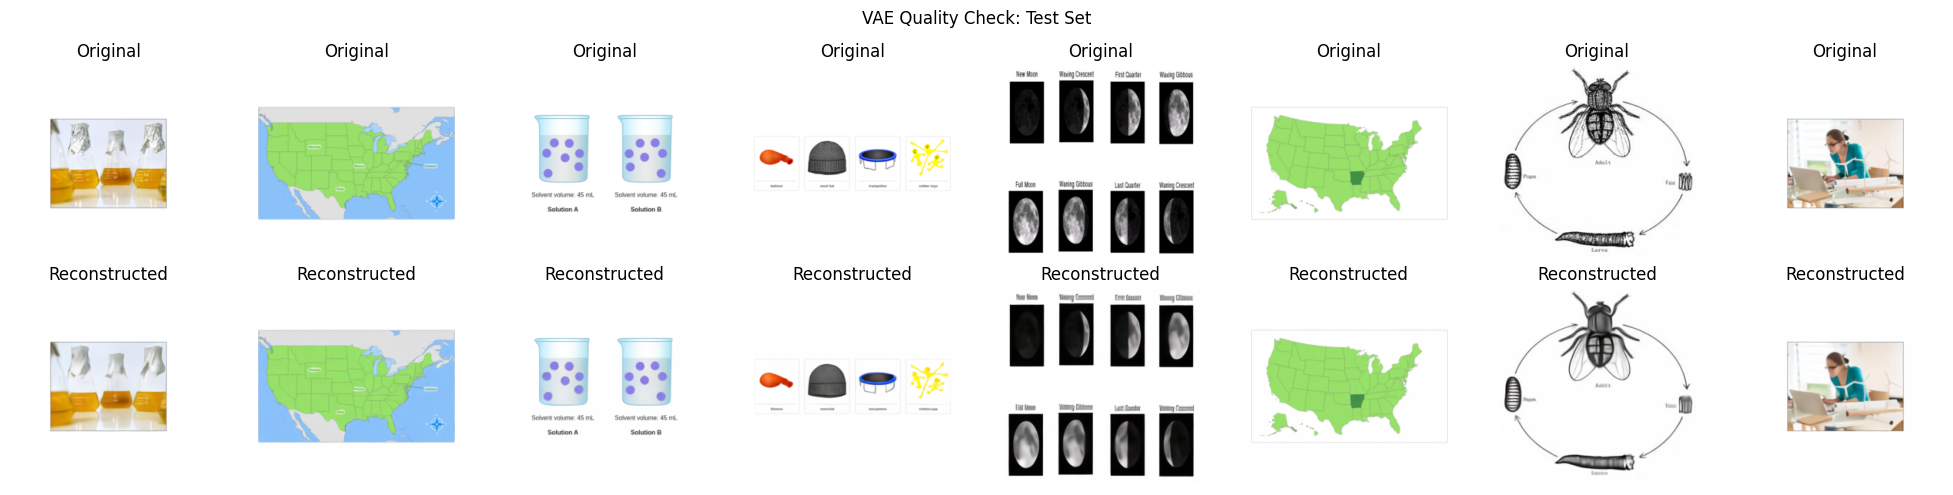

In [ ]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchmetrics.functional import structural_similarity_index_measure as ssim
from torch.utils.data import Dataset, DataLoader, random_split
from diffusers import AutoencoderKL

# Device Setup
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Loading the Educational Diagram Dataset
data = torch.load("educational_diagram_data.pt")
images = data["images"]  # Tensor of shape (N, 3, H, W)

# Define the Dataset Class=
class ImageOnlyDataset(Dataset):
    def __init__(self, images_tensor):
        self.images = images_tensor
    def __len__(self):
        return self.images.shape[0]
    def __getitem__(self, idx):
        return self.images[idx]

# Creating the Dataset Splits
full_ds = ImageOnlyDataset(images)
train_size = int(0.8 * len(full_ds))
val_size = int(0.1 * len(full_ds))
test_size = len(full_ds) - train_size - val_size
_, _, test_ds = random_split(full_ds, [train_size, val_size, test_size])

# Test DataLoader
test_loader = DataLoader(test_ds, batch_size=8, shuffle=False)

# Loading the Pretrained VAE
vae = AutoencoderKL.from_pretrained("runwayml/stable-diffusion-v1-5", subfolder="vae").to(device)

# Loading the Fine-Tuned Full Model
vae.load_state_dict(torch.load("best_fine_tuned_vae.pth", map_location=device))
vae.eval()

# Selecting a Batch from Test Loader
test_iter = iter(test_loader)
sample_batch = next(test_iter).to(device)  # shape: (8, 3, 128, 128)

# Encoding and Decoding
with torch.no_grad():
    z = vae.encode(sample_batch).latent_dist.sample() * vae.config.scaling_factor
    recon = torch.sigmoid(vae.decode(z).sample)  # Output in [0,1]

# Computing Evaluation Metrics
mse_value = F.mse_loss(recon, sample_batch).item()
ssim_value = ssim(recon, sample_batch, data_range=1.0).item()

print(f"\nTest MSE: {mse_value:.6f}")
print(f"Test SSIM: {ssim_value:.6f}")

# Clamping & Moving to CPU for Visualization
sample_batch = sample_batch.cpu().clamp(0, 1)
recon = recon.cpu().clamp(0, 1)

# Plotting the Original vs Reconstructed Images
fig, axs = plt.subplots(2, 8, figsize=(20, 5))
for i in range(8):
    axs[0, i].imshow(sample_batch[i].permute(1, 2, 0))
    axs[0, i].axis('off')
    axs[0, i].set_title("Original")

    axs[1, i].imshow(recon[i].permute(1, 2, 0))
    axs[1, i].axis('off')
    axs[1, i].set_title("Reconstructed")

plt.suptitle("VAE Quality Check: Test Set")
plt.tight_layout()
plt.show()

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from tqdm.auto import tqdm
from diffusers import AutoencoderKL
import os

# Setting up the Device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Loading Educational Diagram Dataset
data = torch.load("educational_diagram_data.pt", map_location="cpu")
images = data["images"]                   # [N, 3, 256, 256]
text_embeddings = data["text_embeddings"] # [N, 768]

print(f"Loaded {images.shape[0]} images and text embeddings.")

# Defining the Dataset and DataLoader
class FullDataset(Dataset):
    def __init__(self, images, text_embeddings):
        self.images = images
        self.text_embeddings = text_embeddings

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        return self.images[idx], self.text_embeddings[idx]

dataset = FullDataset(images, text_embeddings)

loader = DataLoader(
    dataset,
    batch_size=32,
    shuffle=False,
    num_workers=0,
    pin_memory=True
)

# Loading the Pretrained VAE Encoder
vae = AutoencoderKL.from_pretrained(
    "runwayml/stable-diffusion-v1-5",
    subfolder="vae",
    torch_dtype=torch.float16  )
).to(device)
vae.eval()

print("Loaded pretrained VAE encoder.")

# Extracting the Latents and saving them
all_latents = []
all_texts = []

with torch.no_grad():
    for img_batch, txt_batch in tqdm(loader, desc="Extracting latents"):
        img_batch = img_batch.to(device, dtype=torch.float16)

        # Encoding the images into latents
        latent_dist = vae.encode(img_batch).latent_dist
        z = latent_dist.mean

        all_latents.append(z.cpu())
        all_texts.append(txt_batch)

# Stacking all
all_latents = torch.cat(all_latents, dim=0)    # [N, 4, 32, 32]
all_texts   = torch.cat(all_texts, dim=0)       # [N, 768]

# Saving
os.makedirs("latent_dataset", exist_ok=True)
torch.save({
    "z": all_latents,
    "text_embeddings": all_texts
}, "latent_dataset/latent_text_data.pt")

print(f"Saved {all_latents.shape[0]} latents and text embeddings to 'latent_dataset/latent_text_data.pt'.")

/opt/conda/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Using device: cuda
Loaded 9573 images and text embeddings.
Loaded pretrained VAE encoder.


Extracting latents: 100%|██████████| 300/300 [00:38<00:00,  7.72it/s]


Saved 9573 latents and text embeddings to 'latent_dataset/latent_text_data.pt'.
